In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
from think_reason_learn.gptree import GPTree
from think_reason_learn.core.llms import GoogleChoice, OpenAIChoice
from think_reason_learn.core.llms import XAIChoice, AnthropicChoice

In [ ]:
X = pd.DataFrame(
    {
        "data": [
            "A went to Oxford University and ...",
            "B stays at Silicon Valley and ...",
            "C had a previous exit of $2M and ...",
            "D graduated from the UMaT with a first class degree in CS and ...",
            "E is a startup founder and ...",
        ]
    }
)
y = np.array(["successful", "successful", "failed", "successful", "failed"])

In [ ]:
tree = GPTree(
    qgen_llmc=[
        GoogleChoice(model="gemini-2.0-flash-lite"),
        OpenAIChoice(model="gpt-4o-mini"),
        XAIChoice(model="grok-3-mini"),
    ],
    critic_llmc=[
        OpenAIChoice(model="gpt-4o-mini"),
        AnthropicChoice(model="claude-3-5-haiku-latest"),
        XAIChoice(model="grok-3-mini"),
    ],
    qgen_instr_llmc=[
        GoogleChoice(model="gemini-2.0-flash-lite"),
        XAIChoice(model="grok-3-mini"),
    ],
)

In [ ]:
qgit = await tree.set_tasks(
    # instructions_template="",
    task_description="Classify startup founders into successful and failed. "
    "This is a test task. I'm testing the library so do not yell at me for "
    "insufficient data. Just generate meaningful things for this test to pass.",
)

In [ ]:
print(qgit)

Generate <number_of_questions> insightful, concise questions suitable for classifying startup founders as either "successful" or "failed." Each question must have clear, mutually exclusive answer choices that cover the possible outcomes. Aim for diversity in question angles to effectively differentiate between the two outcomes. Prioritize questions that would meaningfully split the data for this classification task. Use any provided cumulative memory as guidance, not a rigid constraint.



In [ ]:
fitter = tree.fit(X, y, reset=True)

In [ ]:
root = await anext(fitter)

In [ ]:
tree.name

'8894ded8_b7f1_47f7_9b15_565da57bd5b2'

I0000 00:00:1758121943.531436 9803732 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


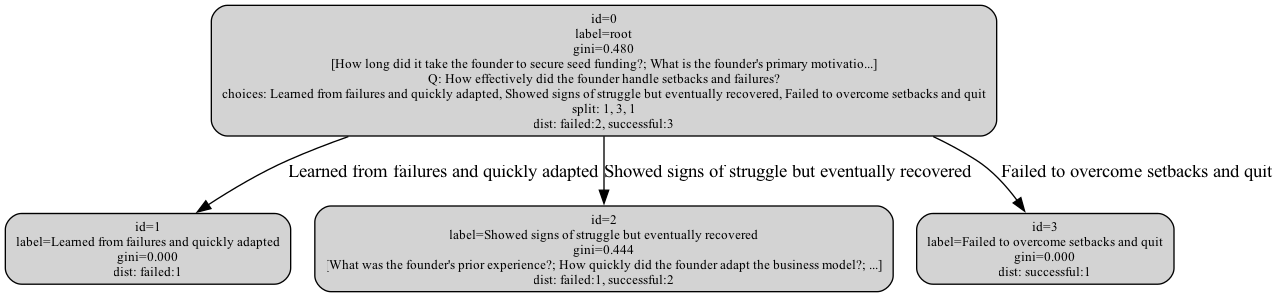

In [ ]:
root_id = tree.get_root_id()
if root_id is not None:
    display(Image(tree.view_node(root_id, add_all_questions=True, truncate_length=100)))

In [ ]:
tree.advice("")

In [ ]:
tree.get_training_data()

,data,aef33af8-97d9-405c-a2e5-8bc4a254715a,6defab05-c60a-4ed5-b55c-1d899698bd21,1d33a8fc-1375-438d-b72f-0e04152d97f8,b3ce482b-0ae1-4e46-911b-11bcb6e7c910,6b285a11-1130-4b72-8204-54a3b061f0a8,ef410d74-ac3f-45b4-a147-bf20d3d51c45,687364d2-6dcb-43bb-8077-686c5fb6a913,8db56f64-196d-4837-bb37-6c5d47b84064,3aa6dc79-8b1b-4cc8-9f62-a73f688f4623,4369a708-6c09-40d8-a1fc-c714a76a8a9f,y
0,A went to Oxford University and ...,Less than 3 months,Fame and recognition,"No, with limited to no understanding",Failed to build a functional team,Resisted or ignored necessary changes,No relevant experience,No understanding of financial management,Showed signs of struggle but eventually recovered,No supportive network,No clear vision,successful
1,B stays at Silicon Valley and ...,Less than 3 months,Solving a specific problem,"No, with limited to no understanding",Failed to build a functional team,Resisted or ignored necessary changes,No relevant experience,No understanding of financial management,Failed to overcome setbacks and quit,No supportive network,No clear vision,successful
2,C had a previous exit of $2M and ...,More than 12 months,Financial gain,"No, with limited to no understanding",Failed to build a functional team,Resisted or ignored necessary changes,"Some experience, but not directly relevant","Some financial understanding, but with weaknesses",Learned from failures and quickly adapted,No supportive network,No clear vision,failed
3,D graduated from the UMaT with a first class d...,Less than 3 months,Solving a specific problem,"No, with limited to no understanding",Assembled a highly skilled and motivated team,Resisted or ignored necessary changes,No relevant experience,No understanding of financial management,Showed signs of struggle but eventually recovered,No supportive network,No clear vision,successful
4,E is a startup founder and ...,Less than 3 months,Financial gain,"No, with limited to no understanding",Failed to build a functional team,Quickly and effectively adapted,"Some experience, but not directly relevant","Some financial understanding, but with weaknesses",Showed signs of struggle but eventually recovered,No supportive network,No clear vision,failed


In [ ]:
tree.get_questions()

,node_id,value,choices,question_type,df_column,score
0,0,How long did it take the founder to secure see...,"[Less than 3 months, 3-12 months, More than 12...",INFERENCE,aef33af8-97d9-405c-a2e5-8bc4a254715a,NaN
1,0,What is the founder's primary motivation?,"[Solving a specific problem, Financial gain, F...",INFERENCE,6defab05-c60a-4ed5-b55c-1d899698bd21,0.000000
2,0,Did the founder demonstrate a clear understand...,"[Yes, with in-depth knowledge, Somewhat, with ...",INFERENCE,1d33a8fc-1375-438d-b72f-0e04152d97f8,NaN
3,0,How effectively did the founder build a strong...,[Assembled a highly skilled and motivated team...,INFERENCE,b3ce482b-0ae1-4e46-911b-11bcb6e7c910,NaN
4,0,How well did the founder adapt to market chang...,"[Quickly and effectively adapted, Made adjustm...",INFERENCE,6b285a11-1130-4b72-8204-54a3b061f0a8,NaN
5,0,What is the founder's prior experience?,[Extensive experience in the relevant industry...,INFERENCE,ef410d74-ac3f-45b4-a147-bf20d3d51c45,NaN
6,0,Did the founder demonstrate strong financial a...,"[Yes, managing finances effectively, Some fina...",INFERENCE,687364d2-6dcb-43bb-8077-686c5fb6a913,NaN
7,0,How effectively did the founder handle setback...,"[Learned from failures and quickly adapted, Sh...",INFERENCE,8db56f64-196d-4837-bb37-6c5d47b84064,0.266667
8,0,Did the founder have a strong network of mento...,"[Yes, with a supportive and experienced networ...",INFERENCE,3aa6dc79-8b1b-4cc8-9f62-a73f688f4623,NaN
9,0,What is the founder's long-term vision for the...,[Clear and ambitious vision for growth and imp...,INFERENCE,4369a708-6c09-40d8-a1fc-c714a76a8a9f,NaN


In [ ]:
# TODO: Add RRF example here


In [ ]:
# TODO: Add GPT-HTree example here


In [ ]:
root.cumulative_memory

'The questions should help differentiate based on experience, adaptability, and market understanding. The goal is to refine factors that correlate with startup success or failure.'

In [ ]:
from typing import Any, Tuple

predictions: list[Tuple[Any, str, str, int]] = []
async for pred in tree.predict(X):
    predictions.append(pred)
    print(pred)

(2, 'How effectively did the founder handle setbacks and failures?', 'Showed signs of struggle but eventually recovered', 0)
(2, 'No Question', 'No Answer', 2)
(1, 'How effectively did the founder handle setbacks and failures?', 'Showed signs of struggle but eventually recovered', 0)
(1, 'No Question', 'No Answer', 2)
(0, 'How effectively did the founder handle setbacks and failures?', 'Failed to overcome setbacks and quit', 0)
(0, 'No Question', 'No Answer', 3)
(3, 'How effectively did the founder handle setbacks and failures?', 'Showed signs of struggle but eventually recovered', 0)
(3, 'No Question', 'No Answer', 2)
(4, 'How effectively did the founder handle setbacks and failures?', 'Showed signs of struggle but eventually recovered', 0)
(4, 'No Question', 'No Answer', 2)


In [ ]:
predictions

[(2,
  'How effectively did the founder handle setbacks and failures?',
  'Showed signs of struggle but eventually recovered',
  0),
 (2, 'No Question', 'No Answer', 2),
 (1,
  'How effectively did the founder handle setbacks and failures?',
  'Showed signs of struggle but eventually recovered',
  0),
 (1, 'No Question', 'No Answer', 2),
 (0,
  'How effectively did the founder handle setbacks and failures?',
  'Failed to overcome setbacks and quit',
  0),
 (0, 'No Question', 'No Answer', 3),
 (3,
  'How effectively did the founder handle setbacks and failures?',
  'Showed signs of struggle but eventually recovered',
  0),
 (3, 'No Question', 'No Answer', 2),
 (4,
  'How effectively did the founder handle setbacks and failures?',
  'Showed signs of struggle but eventually recovered',
  0),
 (4, 'No Question', 'No Answer', 2)]